# Student Performance Data Set
## Description

Dataset describing student performance in secondary education high school, with the target of predicting their final grade. 

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1 | school - student's school | binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira |
| 2 | sex - student's sex | binary: "F" - female or "M" - male |
| 3 | age - student's age | numeric: from 15 to 22 |
| 4 | address - student's home address type | binary: "U" - urban or "R" - rural |
| 5 | famsize - family size | binary: "LE3" - less or equal to 3 or "GT3" - greater than 3 |
| 6 | Pstatus - parent's cohabitation status | binary: "T" - living together or "A" - apart |
| 7 | Medu - mother's education | numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education |
| 8 | Fedu - father's education | numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary | ed| ucation or 4 – higher education |
| 9 | Mjob - mother's job | nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), | "a| t_home" or "other" |
| 10 |  Fjob - father's job | nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other" |
| 11 |  reason - reason to choose this school | nominal: close to "home", school "reputation", "course" preference or "other" |
| 12 |  guardian - student's guardian | nominal: "mother", "father" or "other" |
| 13 |  traveltime - home to school travel time | numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour |
| 14 |  studytime - weekly study time | numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours |
| 15 |  failures - number of past class failures | numeric: n if 1<=n<3, else 4 |
| 16 |  schoolsup - extra educational support | binary: yes or no |
| 17 |  famsup - family educational support | binary: yes or no |
| 18 |  paid - extra paid classes within the course subject (Math or Portuguese) | binary: yes or no |
| 19 |  activities - extra-curricular activities | binary: yes or no |
| 20 |  nursery - attended nursery school | binary: yes or no |
| 21 |  higher - wants to take higher education | binary: yes or no |
| 22 |  internet - Internet access at home | binary: yes or no |
| 23 |  romantic - with a romantic relationship | binary: yes or no |
| 24 |  famrel - quality of family relationships | numeric: from 1 - very bad to 5 - excellent |
| 25 |  freetime - free time after school | numeric: from 1 - very low to 5 - very high |
| 26 |  goout - going out with friends | numeric: from 1 - very low to 5 - very high |
| 27 |  Dalc - workday alcohol consumption | numeric: from 1 - very low to 5 - very high |
| 28 |  Walc - weekend alcohol consumption | numeric: from 1 - very low to 5 - very high |
| 29 |  health - current health status | numeric: from 1 - very bad to 5 - very good |
| 30 |  absences - number of school absences | numeric: from 0 to 93 |
| 31 | G1 - first period grade | numeric: from 0 to 20 |
| 32 | G2 - second period grade | numeric: from 0 to 20 |
| 33 | G3 - final grade | numeric: from 0 to 20, output target |

## Importing and processing dataset

In [33]:
import numpy as np
import pandas as pd

column_names = [
    'school',
    'sex',
    'age',
    'address',
    'famsize',
    'Pstatus',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G1',
    'G2',
    'G3']

features = column_names[:-1]
targets = column_names[-1:]

with open("../../datasets/regression/dataset_Facebook.csv", "r") as dataset_file:
    raw_data = pd.read_csv('../../datasets/regression/student-por.csv', header = 0, sep = ';')


## Preparing the Dataset

In [34]:
prepared_data = raw_data.fillna(-1)


The following block prints the shape and column datatypes of the processed dataset.

In [35]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(649, 33)
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Preprocessing the Dataset

In [36]:
from sklearn.model_selection import train_test_split

X_full = prepared_data[features].copy()
y_full = prepared_data[targets].copy().to_numpy().flatten()

# Split the dataset into two parts, one part training, the other, testing and valating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, valating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

object_cols = [
    'school',
    'sex',
    'address',
    'famsize',
    'Pstatus',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health']

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Drop categorical columns.
drop_X_train = X_train.drop(columns=object_cols)
drop_X_test = X_test.drop(columns=object_cols)
drop_X_val = X_val.drop(columns=object_cols)

# Apply ordinal encoder to each column with categorical data
OE_X_train = X_train.copy()
OE_X_test = X_test.copy()
OE_X_val = X_val.copy()

ordinal_encoder = OrdinalEncoder()
OE_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
OE_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])
OE_X_val[object_cols] = ordinal_encoder.transform(X_val[object_cols])

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))
# Put back removed index from One-hot encoding
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index
OH_cols_val.index = X_val.index
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)
num_X_val = X_val.drop(object_cols, axis=1)
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_val = pd.concat([num_X_val, OH_cols_val], axis=1)

## Training on Multiple Regressors

In [37]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from utilities import train_estimators, plot_estimator_scores

## Training on Multiple Regressors

### Linear Regression

In [38]:
LinearRegressionEstimator = LinearRegression().fit(drop_X_train, y_train)
LR_train_score = LinearRegressionEstimator.score(drop_X_train, y_train)
LR_test_score = LinearRegressionEstimator.score(drop_X_test, y_test)
LR_val_score = LinearRegressionEstimator.score(drop_X_val, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')
LinearRegressionEstimator = LinearRegression().fit(OE_X_train, y_train)
LR_train_score = LinearRegressionEstimator.score(OE_X_train, y_train)
LR_test_score = LinearRegressionEstimator.score(OE_X_test, y_test)
LR_val_score = LinearRegressionEstimator.score(OE_X_val, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')
LinearRegressionEstimator = LinearRegression().fit(OH_X_train, y_train)
LR_train_score = LinearRegressionEstimator.score(OH_X_train, y_train)
LR_test_score = LinearRegressionEstimator.score(OH_X_test, y_test)
LR_val_score = LinearRegressionEstimator.score(OH_X_val, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')

LR_train_score=0.8513378056175046, LR_test_score=0.8450695760378392, LR_val_score=0.8523259156121653
LR_train_score=0.8600766173443981, LR_test_score=0.8507386217741855, LR_val_score=0.8307929641155595
LR_train_score=0.8691452436443258, LR_test_score=0.8306572913789894, LR_val_score=0.8142563892442715


### SVM Regression

Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...


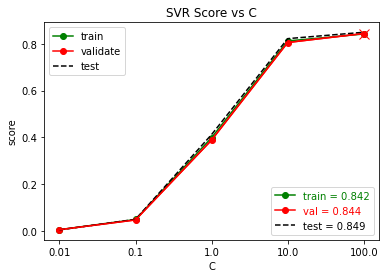

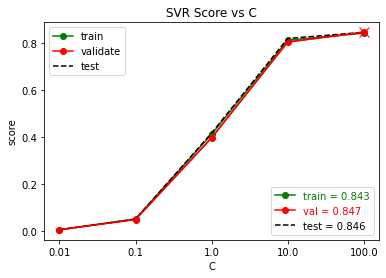

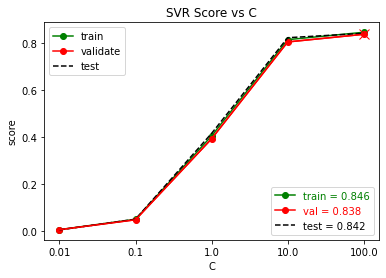

In [39]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0]

SVMEstimators = train_estimators(drop_X_train, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
SVMEstimators = train_estimators(OE_X_train, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
SVMEstimators = train_estimators(OH_X_train, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Decision Tree Regression

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...
Traini

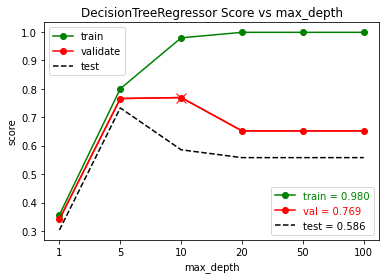

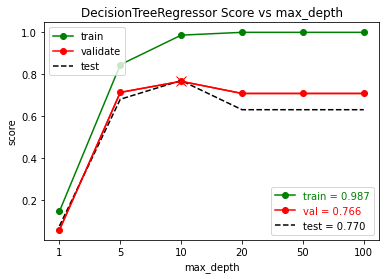

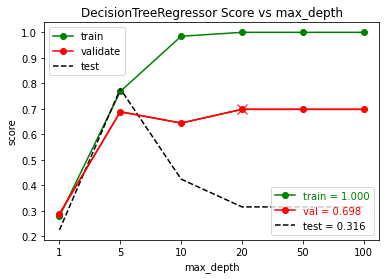

In [40]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(drop_X_train, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
DecisionTreeEstimators = train_estimators(OE_X_train, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
DecisionTreeEstimators = train_estimators(OH_X_train, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### RandomForest Regressor

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...
Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...
Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20,

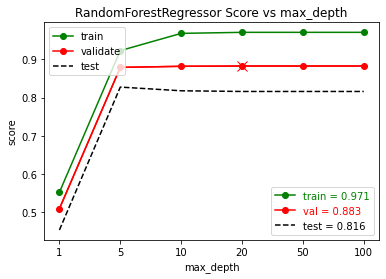

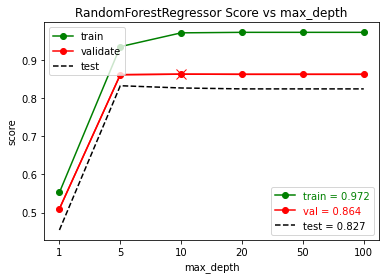

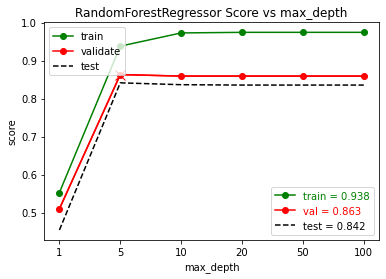

In [41]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(drop_X_train, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
RandomTreeEstimators = train_estimators(OE_X_train, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
RandomTreeEstimators = train_estimators(OH_X_train, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### K-nearest Regressor

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...
Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...
Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


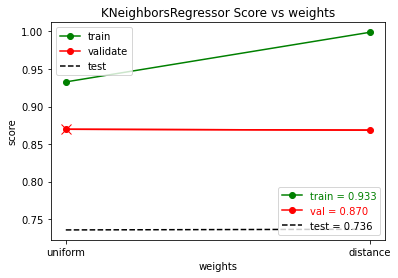

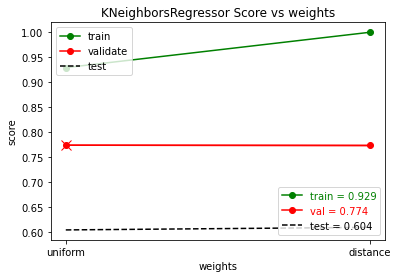

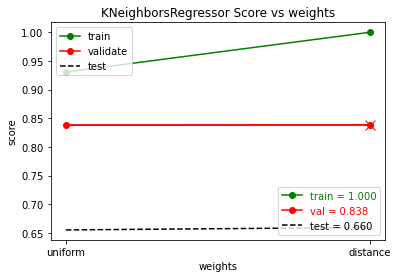

In [42]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(drop_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
KNearestEstimators = train_estimators(OE_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
KNearestEstimators = train_estimators(OH_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...


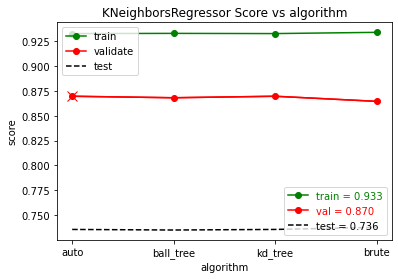

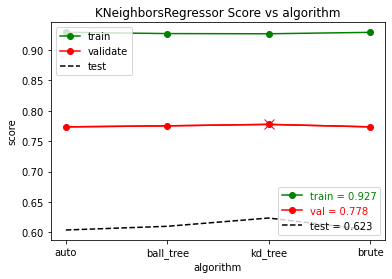

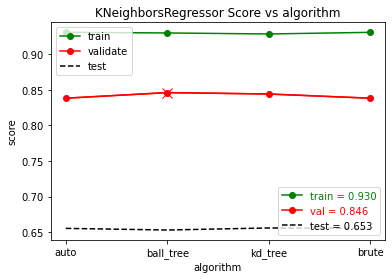

In [43]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(drop_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
KNearestEstimators = train_estimators(OE_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
KNearestEstimators = train_estimators(OH_X_train, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Ada Boost Regression

Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=500, random_state=0)...
Training AdaBoostRegressor(n_estimators=1000, random_state=0)...
Training AdaBoostRegressor(n_estimators=5000, random_state=0)...
Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=500, random_state=0)...
Training AdaBoostRegressor(n_estimators=1000, random_state=0)...
Training AdaBoostRegressor(n_estimators=5000, random_state=0)...
Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=50

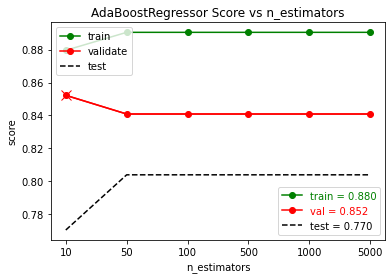

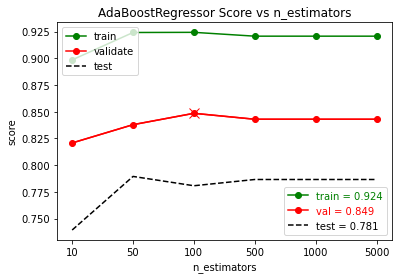

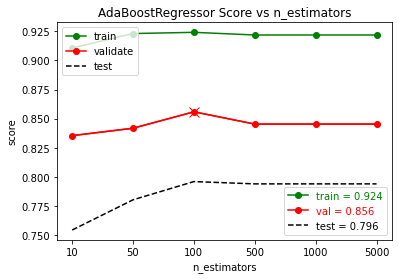

In [44]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(drop_X_train, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)
AdaBoostEstimators = train_estimators(OE_X_train, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)
AdaBoostEstimators = train_estimators(OH_X_train, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Gaussian Process Regressor

In [45]:
drop_gaussian_nb = GaussianProcessRegressor()
NaiveBayesRegressor = drop_gaussian_nb.fit(drop_X_train, y_train)
gaussian_process_train_score = NaiveBayesRegressor.score(drop_X_train, y_train)
gaussian_process_test_score =  NaiveBayesRegressor.score(drop_X_test, y_test)
gaussian_process_val_score =  NaiveBayesRegressor.score(drop_X_val, y_val)
print(f'{gaussian_process_train_score=}, {gaussian_process_val_score=}, {gaussian_process_test_score=}')

OE_gaussian_nb = GaussianProcessRegressor()
NaiveBayesRegressor = OE_gaussian_nb.fit(OE_X_train, y_train)
gaussian_process_train_score = NaiveBayesRegressor.score(OE_X_train, y_train)
gaussian_process_test_score =  NaiveBayesRegressor.score(OE_X_test, y_test)
gaussian_process_val_score =  NaiveBayesRegressor.score(OE_X_val, y_val)
print(f'{gaussian_process_train_score=}, {gaussian_process_val_score=}, {gaussian_process_test_score=}')

OH_gaussian_nb = GaussianProcessRegressor()
NaiveBayesRegressor = OH_gaussian_nb.fit(OH_X_train, y_train)
gaussian_process_train_score = NaiveBayesRegressor.score(OH_X_train, y_train)
gaussian_process_test_score =  NaiveBayesRegressor.score(OH_X_test, y_test)
gaussian_process_val_score =  NaiveBayesRegressor.score(OH_X_val, y_val)
print(f'{gaussian_process_train_score=}, {gaussian_process_val_score=}, {gaussian_process_test_score=}')

gaussian_process_train_score=0.9989475122462976, gaussian_process_val_score=-2.0046480735445438, gaussian_process_test_score=-2.762425332935299
gaussian_process_train_score=1.0, gaussian_process_val_score=-11.165309989979223, gaussian_process_test_score=-13.73000375992472
gaussian_process_train_score=1.0, gaussian_process_val_score=-11.192008408013143, gaussian_process_test_score=-13.790408951272717


### Neural Network Classification Through a Multi-Layer Perceptron

In [46]:
mlp = MLPRegressor(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=False).fit(drop_X_train, y_train)

print(f'Training Score: {mlp.score(drop_X_train, y_train)}')
print(f'Testing Score: {mlp.score(drop_X_test, y_test)}')
print(f'Validation Score: {mlp.score(drop_X_val, y_val)}')

mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.001,
                                            momentum=0.4, random_state=0, verbose=False).fit(drop_X_train, y_train)

print(f'Training Score: {mlp.score(drop_X_train, y_train)}')
print(f'Testing Score: {mlp.score(drop_X_test, y_test)}')
print(f'Validation Score: {mlp.score(drop_X_val, y_val)}')

Training Score: 0.8495623736595938
Testing Score: 0.8449008624196704
Validation Score: 0.8471388596051193
Training Score: 0.8664324096285607
Testing Score: 0.8191055495535342
Validation Score: 0.86205700534989


In [47]:
mlp = MLPRegressor(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=False).fit(OE_X_train, y_train)

print(f'Training Score: {mlp.score(OE_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OE_X_test, y_test)}')
print(f'Validation Score: {mlp.score(OE_X_val, y_val)}')

mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.001,
                                            momentum=0.4, random_state=0, verbose=False).fit(OE_X_train, y_train)

print(f'Training Score: {mlp.score(OE_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OE_X_test, y_test)}')
print(f'Validation Score: {mlp.score(OE_X_val, y_val)}')

Training Score: 0.8584568169764724
Testing Score: 0.8526178360262059
Validation Score: 0.82577509145729
Training Score: 0.9507551475797246
Testing Score: 0.7503497068140685
Validation Score: 0.7357324098306974


In [48]:
mlp = MLPRegressor(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=False).fit(OH_X_train, y_train)

print(f'Training Score: {mlp.score(OH_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OH_X_test, y_test)}')
print(f'Validation Score: {mlp.score(OH_X_val, y_val)}')

mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.001,
                                            momentum=0.4, random_state=0, verbose=False).fit(OH_X_train, y_train)

print(f'Training Score: {mlp.score(OH_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OH_X_test, y_test)}')
print(f'Validation Score: {mlp.score(OH_X_val, y_val)}')

Training Score: 0.8675629214841877
Testing Score: 0.8315566418799839
Validation Score: 0.8113073518653293
Training Score: 0.9759444424381755
Testing Score: 0.64840656708304
Validation Score: 0.8259478422145631
